# USING MNIST DATA SET TO TRAIN DATA SET

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import torchvision
from torch.autograd import Variable

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
# Convert MNIST Image files into Tensor of 4-Dimension (Imgages, Height, Width,)
transform = transforms.Compose([transforms.ToTensor()])

In [3]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11652555.26it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 393745.14it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3207844.50it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5096449.64it/s]


Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [7]:
pwd

'/content'

In [8]:
ls

sample_data/


In [9]:
cd ../

/


In [10]:
pwd

'/'

In [11]:
ls

bin@                        datalab/  lib32@   NGC-DL-CONTAINER-LICENSE  root/  tmp/
boot/                       dev/      lib64@   opt/                      run/   tools/
cnn_data/                   etc/      libx32@  proc/                     sbin@  usr/
content/                    home/     media/   python-apt/               srv/   var/
cuda-keyring_1.0-1_all.deb  lib@      mnt/     python-apt.tar.xz*        sys/


In [12]:
"cnn_data/"

'cnn_data/'

In [13]:
cd content/

/content


In [14]:
pwd

'/content'

### Convolutional and Pooling Layers

In [15]:
# Create a loader to determine a batch size (batch size should be small)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [16]:
# Define CNN Model
# Describe convolutional layer and what its doing (2 convolutional layers)
conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)

In [17]:
# Use 1 MNIST record/Image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [18]:
X_train

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [19]:
X_train.shape

torch.Size([1, 28, 28])

In [20]:
x = X_train.view(1, 1, 28, 28)

In [21]:
# Perform first convolution
x = F.relu(conv1(x)) # Rectified linear Unit for activation function

In [22]:
x.shape

torch.Size([1, 6, 28, 28])

`__1 - single image, 6 - filters, 28X28__`

In [23]:
# Pooling layer
x = F.max_pool2d(x, 2, 2) # kernel of 2 and stride of 2

In [24]:
x.shape  # 28/2 = 14

torch.Size([1, 6, 14, 14])

In [25]:
# Second Convolutional Layer
x = F.relu(conv2(x))

In [26]:
x.shape # Tere is a set pading(No lossing of pixels)

torch.Size([1, 16, 14, 14])

In [27]:
# Pooling Layer
x = F.max_pool2d(x, 2, 2)

In [28]:
x.shape # 14/2 = 7

torch.Size([1, 16, 7, 7])

In [29]:
# Model Class
class ConvoNNModel(nn.Module):
    def __init__(self):
        super(ConvoNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1, padding=1)
        # Fully Connected Layer
        self.fc1 = nn.Linear(7*7*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    # Forward Function
    def forward(self, X_train):
        # Indent the lines within the forward function
        X = F.relu(self.conv1(X_train)) # Use X_train as input
        X = F.max_pool2d(X, 2, 2) # 2 x 2 kernel and stride 2

        # second pass
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2) # 2 ..

        # Re-View to flatten it out
        X = X.view(-1, 7*7*16) # negative one to take the batch size

        # Fully Connected Layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)

        return F.log_softmax(X, dim=1)

In [30]:
# Create an Instance of Model
torch.manual_seed(41)
model = ConvoNNModel()

In [31]:
model

ConvoNNModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [32]:
# Loss Function Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Smaller the learning rate, longer it takes

### Train and Test CNN Model

In [33]:
import time
start_time = time.time()

# Create Variables to Track Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []


# For Loop of Epoch
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1 # Start batches at 1
    y_pred = model(X_train) # Forward Pass, get predicted models from training, Not flattened
    loss = loss_function(y_pred, y_train) # How off we are, Compare the predictions to correct

    predicted = torch.max(y_pred.data, 1)[1] # Add number of corrected predictions.
    batch_corr = (predicted == y_train).sum() # Know how many are correct from this batch
    trn_corr += batch_corr # Add to the total number of correct predictions

    # Update Parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print Results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Test
  with torch.no_grad(): # No gradient, no update of weights and biases
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test) # Forward Pass
      predicted = torch.max(y_val.data, 1)[1] # Add number of corrected predictions.
      tst_corr += (predicted == y_test).sum() # Add to the total number of correct predictions(T = 1, F = 0, and Sum)

    loss = loss_function(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f'Training Took:  {total/60} minutes1')

Epoch: 0  Batch: 600  Loss: 0.3212374746799469
Epoch: 0  Batch: 1200  Loss: 0.2370752990245819
Epoch: 0  Batch: 1800  Loss: 0.43673577904701233
Epoch: 0  Batch: 2400  Loss: 0.028171902522444725
Epoch: 0  Batch: 3000  Loss: 0.2781960666179657
Epoch: 0  Batch: 3600  Loss: 0.07881853729486465
Epoch: 0  Batch: 4200  Loss: 0.24211247265338898
Epoch: 0  Batch: 4800  Loss: 0.751066267490387
Epoch: 0  Batch: 5400  Loss: 0.0016911551356315613
Epoch: 0  Batch: 6000  Loss: 0.0021170235704630613
Epoch: 1  Batch: 600  Loss: 0.044486790895462036
Epoch: 1  Batch: 1200  Loss: 0.003715191036462784
Epoch: 1  Batch: 1800  Loss: 0.06256317347288132
Epoch: 1  Batch: 2400  Loss: 0.01854565367102623
Epoch: 1  Batch: 3000  Loss: 0.003166158450767398
Epoch: 1  Batch: 3600  Loss: 0.0005018253577873111
Epoch: 1  Batch: 4200  Loss: 0.0005767817492596805
Epoch: 1  Batch: 4800  Loss: 0.007412465754896402
Epoch: 1  Batch: 5400  Loss: 0.00022932302090339363
Epoch: 1  Batch: 6000  Loss: 0.003265875857323408
Epoch: 2  

### Check How Correct Model is: By Visualizing

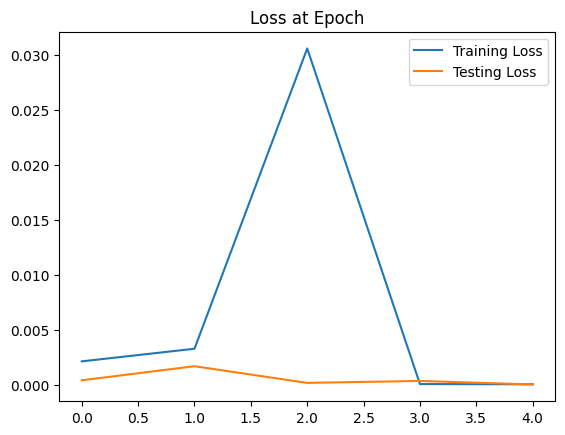

In [35]:
# Visualize the loss at epoch
train_losses = [tl.item() for tl in train_losses]  # Convert tensors to Python scalars
test_losses = [tl.item() for tl in test_losses]  # Convert tensors to Python scalars

plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Loss at Epoch')
plt.legend()
plt.show()

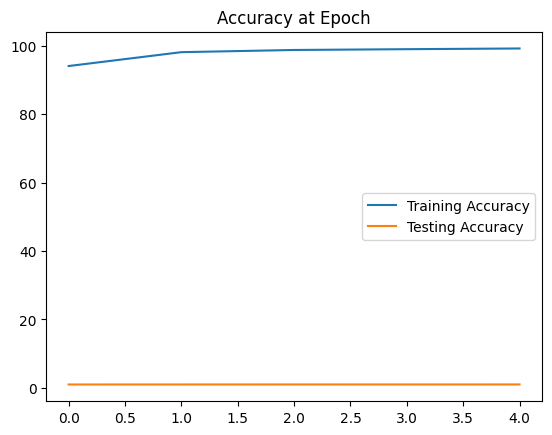

In [36]:
# Visualize the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/10000 for t in test_correct], label='Testing Accuracy') # Changed to list comprehension to divide each element
plt.title('Accuracy at Epoch')
plt.legend()
plt.show()

In [37]:
from torch.utils.data import DataLoader

# Assuming test_data is already defined correctly
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [38]:
with torch.no_grad():
  correct = 0
  for b, (X_test, y_test) in enumerate(test_load_everything):
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()

In [39]:
# Test for correct
correct.item()/len(test_data)*100

99.0

### Run a New Image  through the model

In [40]:
# Grab an Image

test_data[4143] # Gives a tensor with image in it and shows a label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [41]:
# Grab the Data (not label)
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [42]:
# Reshaspe
test_data[4143][0].reshape(1, 1, 28, 28)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

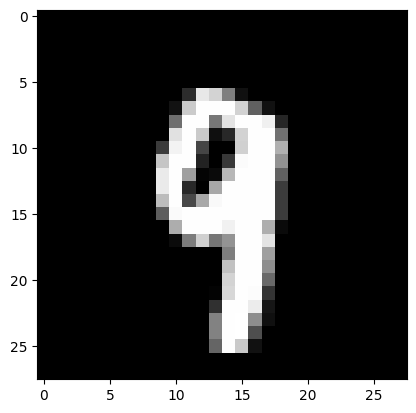

In [43]:
# Show Image
plt.imshow(test_data[4143][0].reshape(28, 28), cmap='gray')

In [44]:
# Pass Image through model
model.eval()
with torch.no_grad():
  new_predictions = model(test_data[4143][0].reshape(1, 1, 28, 28)) # A batch size of 1, 1 color channel and 28 by 28

In [45]:
# Check the predictions (get probabilities)
new_predictions

tensor([[-2.3986e+01, -2.0489e+01, -2.4217e+01, -1.9920e+01, -9.8080e+00,
         -1.8555e+01, -2.5870e+01, -1.6291e+01, -1.7427e+01, -5.5192e-05]])

In [46]:
new_predictions.argmax()

tensor(9)